In [1]:
import keras

Using TensorFlow backend.
D:\Anaconda\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tensorflow2.0\lib\site-packages\tensorflow\py

分类问题： 二分类、多分类

IMDB数据集： 评论总过50000， 按50% 分成训练和测试，二分类问题： positive, negative

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

num_words=10000 表示只会保留常用的10000个单词，文字已经处理成了数字

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

数字转换为单词`

In [5]:
# 字典
word = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

列表转换为tensor， 两种方式

- embedding layer: 填充数据 (samples, word_indices)
- one-hot-encoder: 

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # one-hot: 
    results = np.zeros((len(sequences), dimension))
    for i, s in enumerate(sequences):
        results[i, s] = 1
    return results

In [8]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
train_labels[0]

1

建立网络

In [11]:
x_train.shape, x_test.shape

((25000, 10000), (25000, 10000))

![aa](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

In [12]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000, )))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="Adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


创建验证集， validation

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 422us/step - loss: 0.5722 - accuracy: 0.7576 - val_loss: 0.4281 - val_accuracy: 0.8537
Epoch 2/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.3229 - accuracy: 0.8967 - val_loss: 0.3041 - val_accuracy: 0.8875
Epoch 3/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.2154 - accuracy: 0.9291 - val_loss: 0.2785 - val_accuracy: 0.8892
Epoch 4/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.1610 - accuracy: 0.9511 - val_loss: 0.2769 - val_accuracy: 0.8918
Epoch 5/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.1236 - accuracy: 0.9643 - val_loss: 0.2893 - val_accuracy: 0.8877
Epoch 6/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.0971 - accuracy: 0.9750 - val_loss: 0.3078 - val_accuracy: 0.8829
Epoch 7/20
15000/15000 [==============================] - 2s 1

model.fit() returns a History，一个实例，含有字典元素history

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

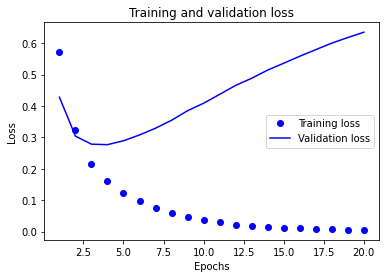

In [21]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

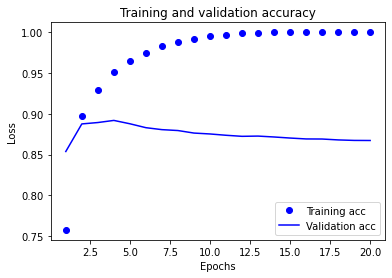

In [22]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 103us/step - loss: 0.5081 - accuracy: 0.8204
Epoch 2/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.2970 - accuracy: 0.9001
Epoch 3/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.2216 - accuracy: 0.9217
Epoch 4/4
25000/25000 [==============================] - 7s 294us/step


In [24]:
results

[0.2977611668586731, 0.8802800178527832]

In [25]:
model.predict(x_test)

array([[0.19726568],
       [0.9998374 ],
       [0.781831  ],
       ...,
       [0.0928739 ],
       [0.06424353],
       [0.43126094]], dtype=float32)

In [27]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 4s 145us/step


[0.2977611668586731, 0.8802800178527832]